In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
data.shape

(545, 13)

In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
print(data.nunique())

# change dtype of "bedrooms bathrooms stories mainroad guestroom basement hotwaterheating airconditioning parking prefarea furnishingstatus" to category
# dtype of "price area" --> numeric

category_col = "bedrooms bathrooms stories mainroad guestroom basement hotwaterheating airconditioning parking prefarea furnishingstatus".split(" ")
data[category_col] = data[category_col].astype("category")

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64


In [ ]:
data.dtypes

price                  int64
area                   int64
bedrooms            category
bathrooms           category
stories             category
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking             category
prefarea            category
furnishingstatus    category
dtype: object

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,price,area
count,5.450000e+02,545.000000
mean,4.766729e+06,5150.541284
std,1.870440e+06,2170.141023
min,1.750000e+06,1650.000000
25%,3.430000e+06,3600.000000
50%,4.340000e+06,4600.000000
75%,5.740000e+06,6360.000000
max,1.330000e+07,16200.000000


In [ ]:
data.describe(include="category")

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,545,545,545,545,545,545,545,545,545,545,545
unique,6,4,4,2,2,2,2,2,4,2,3
top,3,1,2,yes,no,no,no,no,0,no,semi-furnished
freq,300,401,238,468,448,354,520,373,299,417,227


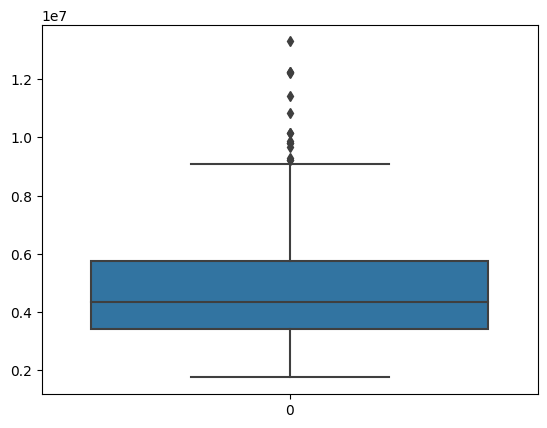

In [ ]:
sns.boxplot(data["price"])
plt.show()

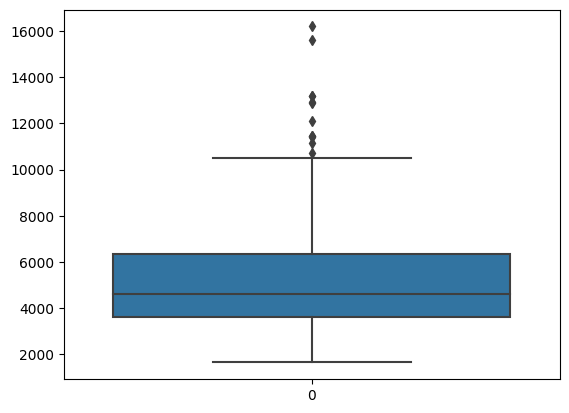

In [ ]:
sns.boxplot(data["area"])
plt.show()

In [ ]:
num_cols = data.select_dtypes("number")

for col in num_cols:
  q1 = np.quantile(data[col], 0.25)
  q3 = np.quantile(data[col], 0.75)
  iqr = q3 - q1

  upper = q3 + 1.5 * iqr
  lower = q1 - 1.5 * iqr

  upper_to_replace = data[data[col] > upper][col].values

  data[col] = data[col].replace(upper_to_replace, upper)

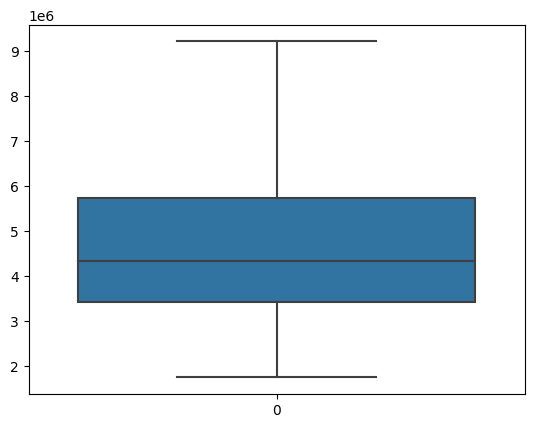

In [ ]:
sns.boxplot(data["price"])
plt.show()

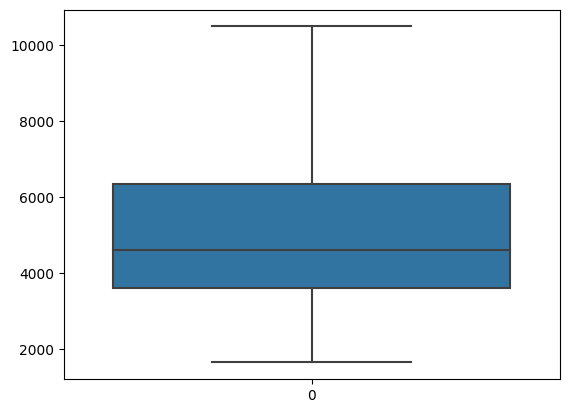

In [ ]:
sns.boxplot(data["area"])
plt.show()

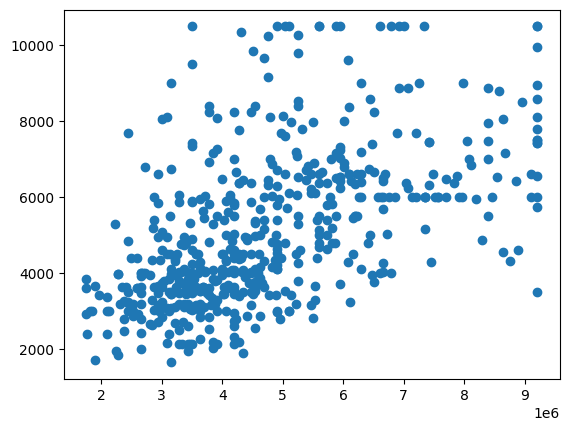

In [ ]:
plt.scatter(x=data["price"], y=data["area"])
plt.show()

In [ ]:
print(data[data["parking"] == 0]["parking"].count())
print(data[data["parking"] == 1]["parking"].count())
print(data[data["parking"] == 2]["parking"].count())
print(data[data["parking"] == 3]["parking"].count())


# price_parking = data.pivot_table(index="price", columns="parking", values="area", aggfunc = len)
# price_parking

299
126
108
12


<Axes: xlabel='furnishingstatus', ylabel='price'>

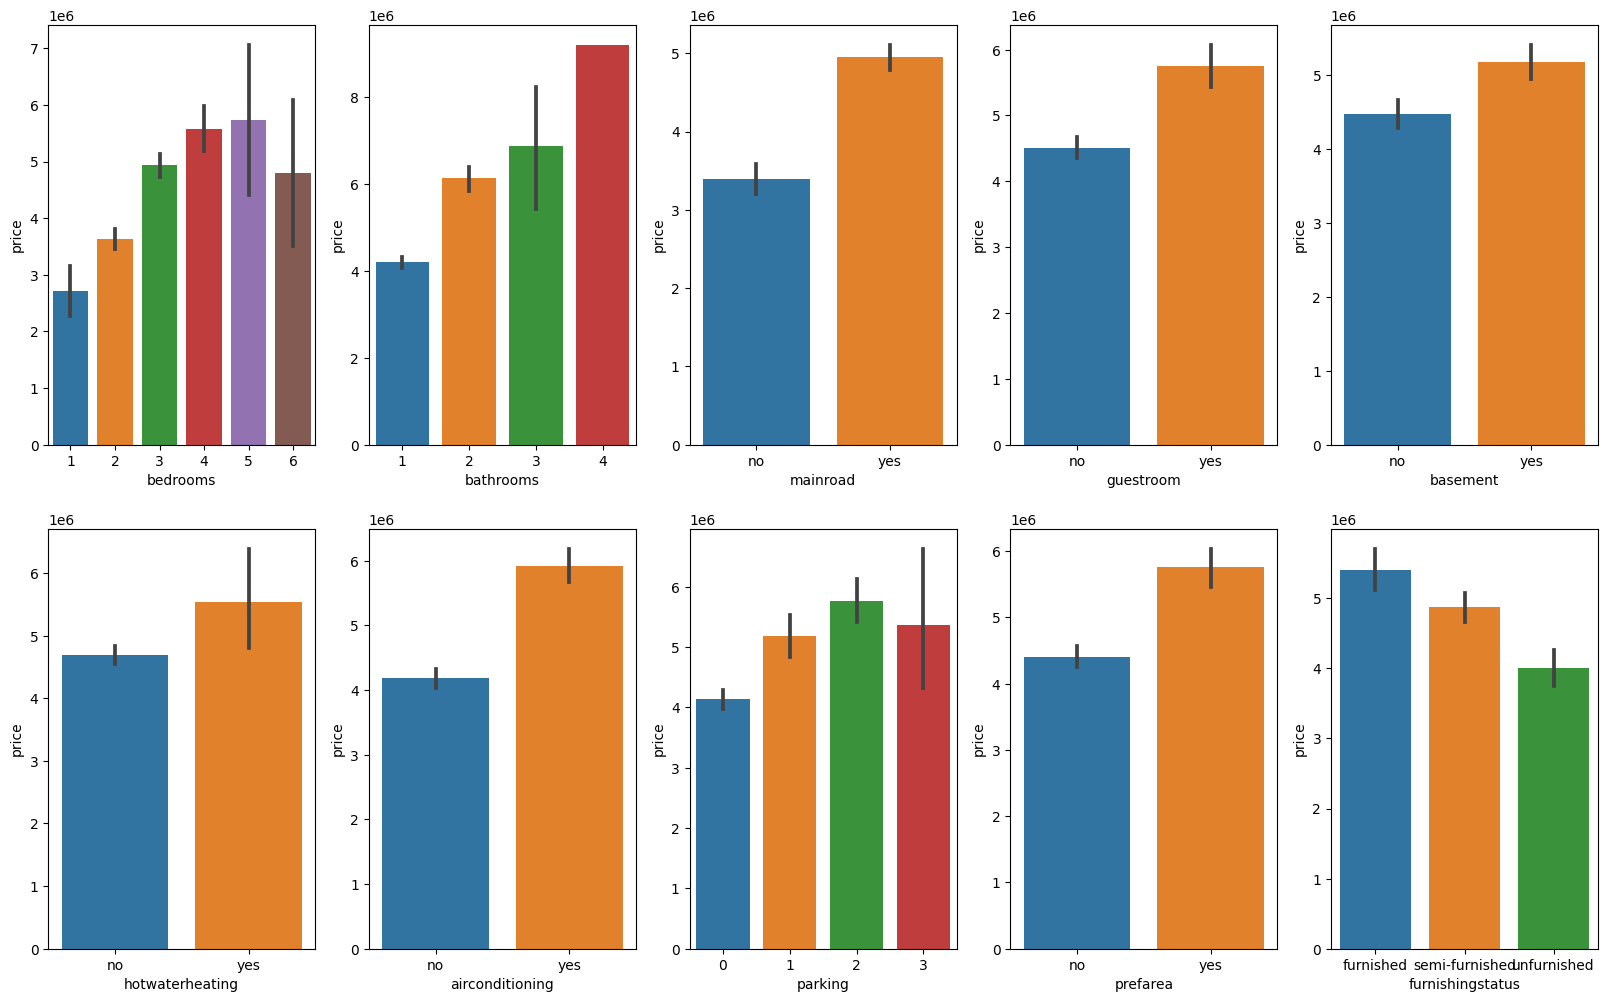

In [ ]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 5, 1)
sns.barplot(x="bedrooms", y="price", data=data)

plt.subplot(2, 5, 2)
sns.barplot(x="bathrooms", y="price", data=data)

plt.subplot(2, 5, 3)
sns.barplot(x="mainroad", y="price", data=data)

plt.subplot(2, 5, 4)
sns.barplot(x="guestroom", y="price", data=data)

plt.subplot(2, 5, 5)
sns.barplot(x="basement", y="price", data=data)

plt.subplot(2, 5, 6)
sns.barplot(x="hotwaterheating", y="price", data=data)

plt.subplot(2, 5, 7)
sns.barplot(x="airconditioning", y="price", data=data)

plt.subplot(2, 5, 8)
sns.barplot(x="parking", y="price", data=data)

plt.subplot(2, 5, 9)
sns.barplot(x="prefarea", y="price", data=data)

plt.subplot(2, 5, 10)
sns.barplot(x="furnishingstatus", y="price", data=data)

<Axes: xlabel='stories', ylabel='price'>

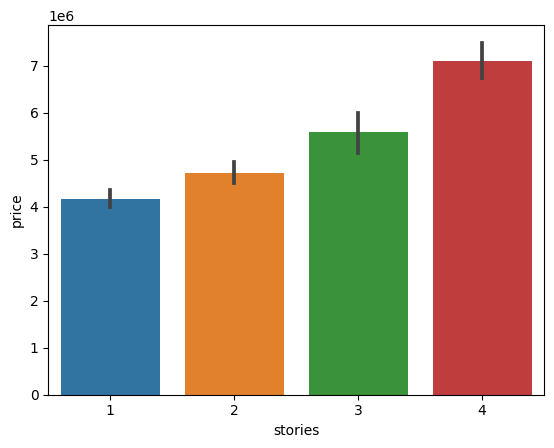

In [ ]:
sns.barplot(x="stories", y="price", data=data)

In [ ]:
data[data["bedrooms"] == 6].mean()

<ipython-input-236-1f277beb1a66>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[data["bedrooms"] == 6].mean()


price    4791500.0
area        3950.0
dtype: float64

In [ ]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,9205000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9205000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,9205000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,9205000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


**Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numerical_cols = data.select_dtypes("number").columns

scaler.fit(data[numerical_cols])
data[numerical_cols] = scaler.transform(data[numerical_cols])
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.00000,0.651977,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,1.00000,0.825989,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1.00000,0.938983,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1.00000,0.661017,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,1.00000,0.651977,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.00939,0.152542,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,0.00230,0.084746,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,0.00000,0.222599,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,0.00000,0.142373,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
data.select_dtypes("category").nunique()

bedrooms            6
bathrooms           4
stories             4
mainroad            2
guestroom           2
basement            2
hotwaterheating     2
airconditioning     2
parking             4
prefarea            2
furnishingstatus    3
dtype: int64

**Encoding**

two way to encode categorical data

1- one hot encoder ==> unorder data

2- ordinal encoder ==> order data

In [ ]:
# label encoding for "mainroad guestroom basement hotwaterheating airconditioning prefarea"
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

col_to_labelEncoding = "mainroad guestroom basement hotwaterheating airconditioning prefarea".split(" ")

for column in col_to_labelEncoding:
  le.fit(data[column])
  data[column] =  le.transform(data[column])

In [ ]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.00000,0.651977,4,2,3,1,0,0,0,1,2,1,furnished
1,1.00000,0.825989,4,4,4,1,0,0,0,1,3,0,furnished
2,1.00000,0.938983,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,1.00000,0.661017,4,2,2,1,0,1,0,1,3,1,furnished
4,1.00000,0.651977,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.00939,0.152542,2,1,1,1,0,1,0,0,2,0,unfurnished
541,0.00230,0.084746,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,0.00000,0.222599,2,1,1,1,0,0,0,0,0,0,unfurnished
543,0.00000,0.142373,3,1,1,0,0,0,0,0,0,0,furnished


In [ ]:
# OneHotEncoder for "furnishingstatus"
data = pd.get_dummies(data, columns=["furnishingstatus"])

In [ ]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.00000,0.651977,4,2,3,1,0,0,0,1,2,1,1,0,0
1,1.00000,0.825989,4,4,4,1,0,0,0,1,3,0,1,0,0
2,1.00000,0.938983,3,2,2,1,0,1,0,0,2,1,0,1,0
3,1.00000,0.661017,4,2,2,1,0,1,0,1,3,1,1,0,0
4,1.00000,0.651977,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.00939,0.152542,2,1,1,1,0,1,0,0,2,0,0,0,1
541,0.00230,0.084746,3,1,1,0,0,0,0,0,0,0,0,1,0
542,0.00000,0.222599,2,1,1,1,0,0,0,0,0,0,0,0,1
543,0.00000,0.142373,3,1,1,0,0,0,0,0,0,0,1,0,0
